[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


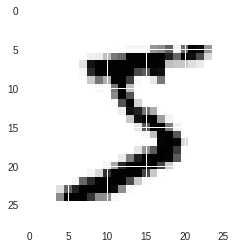

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  608/60000 [..............................] - ETA: 18s - loss: 0.2205 - acc: 0.9293

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 17s 281us/step - loss: 0.1863 - acc: 0.9468
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1831 - acc: 0.9477
Epoch 3/10
 9248/60000 [===>..........................] - ETA: 14s - loss: 0.1832 - acc: 0.9497

60000/60000 [==============================] - 17s 280us/step - loss: 0.1784 - acc: 0.9489
Epoch 4/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.1759 - acc: 0.9500
Epoch 5/10
11968/60000 [====>.........................] - ETA: 13s - loss: 0.1627 - acc: 0.9539

60000/60000 [==============================] - 17s 279us/step - loss: 0.1695 - acc: 0.9513
Epoch 6/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1660 - acc: 0.9531
Epoch 7/10
12800/60000 [=====>........................] - ETA: 13s - loss: 0.1655 - acc: 0.9529

60000/60000 [==============================] - 17s 284us/step - loss: 0.1623 - acc: 0.9535
Epoch 8/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.1573 - acc: 0.9553
Epoch 9/10
12704/60000 [=====>........................] - ETA: 13s - loss: 0.1385 - acc: 0.9602

60000/60000 [==============================] - 17s 280us/step - loss: 0.1545 - acc: 0.9559
Epoch 10/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1487 - acc: 0.9576


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.17263443308100104, 0.9541]


In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[8.2914458e-09 5.2082986e-12 3.0272341e-07 3.1564519e-04 5.6612485e-08
  8.5224963e-07 2.2406913e-14 9.9968183e-01 2.2601412e-09 1.3387505e-06]
 [4.6759092e-06 2.2649613e-06 9.9749941e-01 7.2724462e-05 2.4077547e-16
  2.1988153e-03 2.2087475e-04 4.9831174e-21 1.2384527e-06 2.7488535e-14]
 [4.8688262e-09 9.9581110e-01 3.4914142e-03 2.2687431e-05 7.0996871e-06
  1.2258864e-04 4.4965323e-06 5.4038398e-04 2.1678122e-07 1.4472784e-07]
 [9.9967885e-01 8.6405674e-12 1.9073917e-04 3.5180952e-07 8.9864017e-07
  6.8646528e-05 2.3251439e-05 2.9151242e-05 2.4122255e-07 7.8368121e-06]
 [1.5020942e-06 2.7770739e-09 2.8296688e-05 1.2290576e-07 9.9956149e-01
  2.1011654e-05 5.4309299e-07 3.7932646e-04 9.0503754e-08 7.6640154e-06]
 [5.1479971e-09 9.9109215e-01 1.1245200e-03 5.0954419e-05 2.3226494e-05
  2.8798142e-05 5.2571124e-07 7.6692370e-03 8.1255785e-06 2.4727999e-06]
 [8.0530599e-10 7.5034222e-08 6.0865978e-07 7.3538808e-06 9.9911684e-01
  6.1958696e-04 1.5339443e-08 1.7894813e-04 7.0440517e-05 

In [33]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7fa581bb8438>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7fa581b68668>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7fa581b68438>, 'flatten_2': <keras.layers.core.Flatten object at 0x7fa581bb8cf8>, 'activation_2': <keras.layers.core.Activation object at 0x7fa581b0a080>}


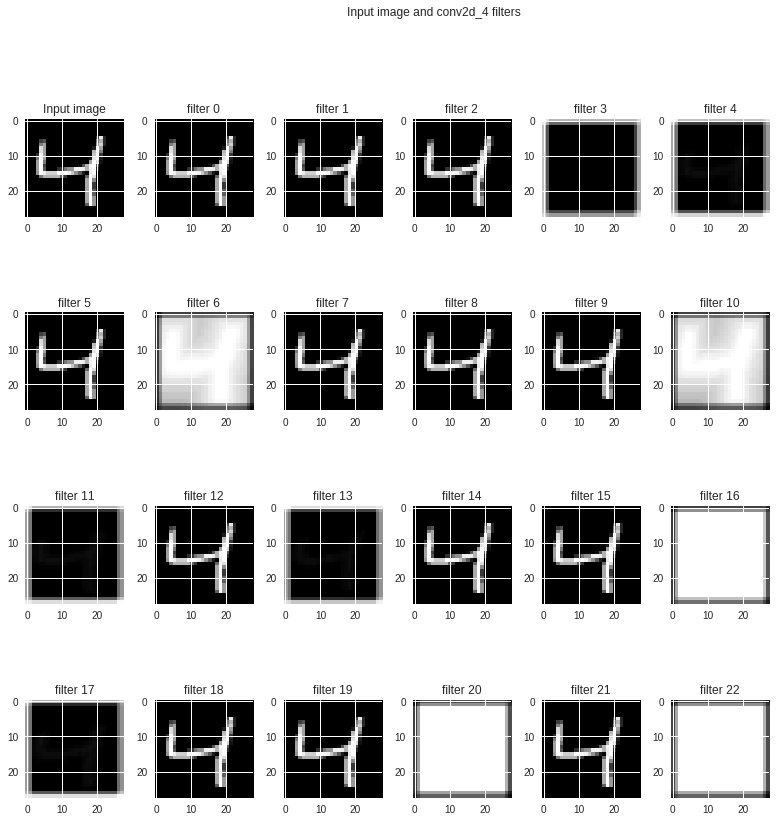

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()